# 1. Import **Libraries**


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 2. Load Dataset

In [3]:
df = pd.read_csv("insurance.csv")


# 3. **Preprocessing**

In [4]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

# 4. Exploratory Data Analysis (EDA)


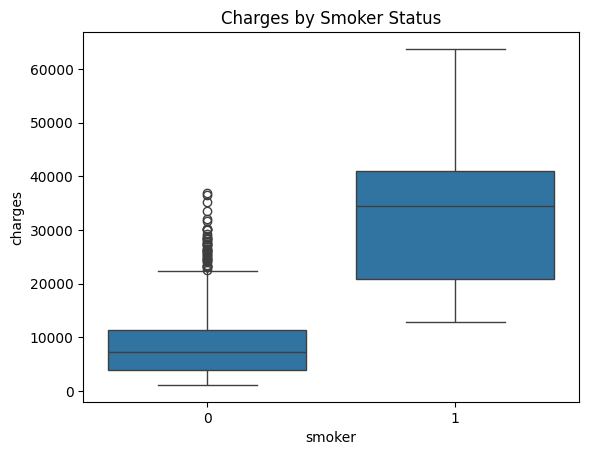

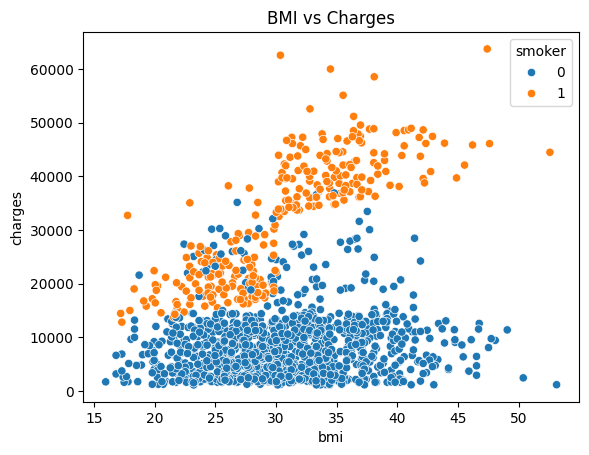

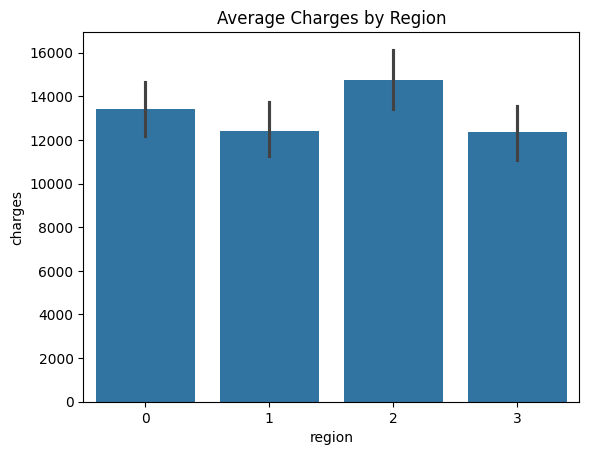

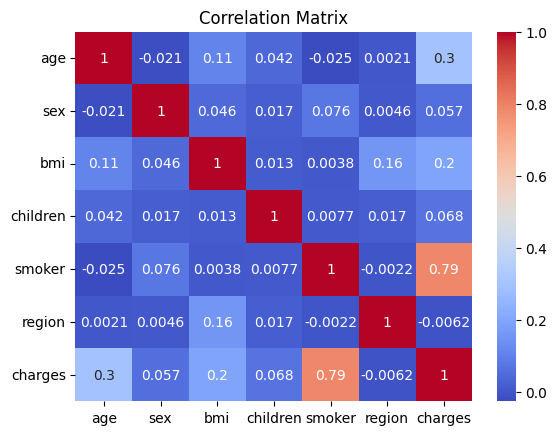

In [5]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges by Smoker Status")
plt.show()

sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("BMI vs Charges")
plt.show()

sns.barplot(x='region', y='charges', data=df)
plt.title("Average Charges by Region")
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# New Section

In [6]:
X = df.drop(columns=['charges'])
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Model Training


## --- Linear Regression ---


In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)



# --- Random Forest Regressor ---


In [8]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 7. Model Evaluation


In [9]:
print("===== MODEL PERFORMANCE =====")
print("Linear Regression:")
print("  R² Score:", r2_score(y_test, y_pred_lr))
print("  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

print("\nRandom Forest Regressor:")
print("  R² Score:", r2_score(y_test, y_pred_rf))
print("  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

===== MODEL PERFORMANCE =====
Linear Regression:
  R² Score: 0.7833463107364539
  RMSE: 5799.587091438356

Random Forest Regressor:
  R² Score: 0.8642606273649586
  RMSE: 4590.5735387944


# 8. Visualize Predictions (Random Forest)


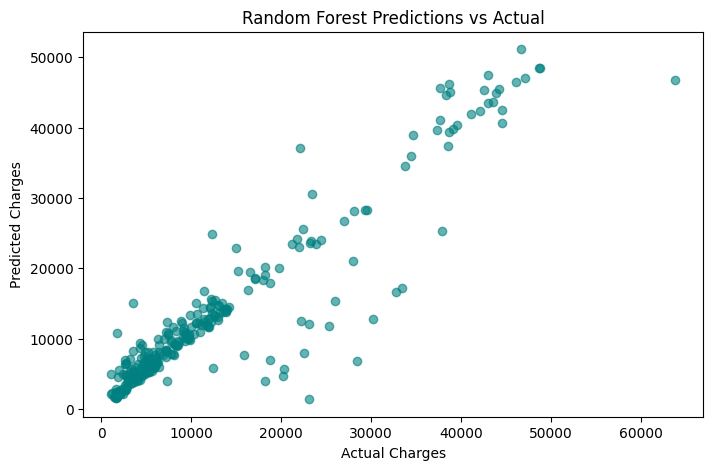

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='teal')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Random Forest Predictions vs Actual")
plt.show()

# 9. Feature Importance (Random Forest)


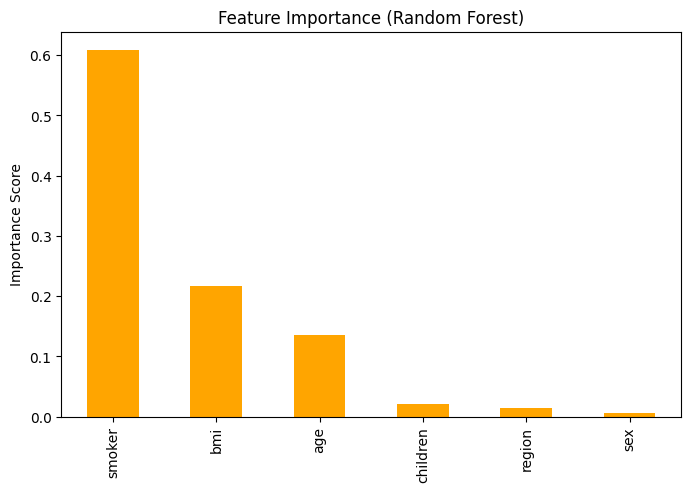


Feature Importance (Random Forest):
smoker      0.608618
bmi         0.216291
age         0.134554
children    0.020199
region      0.013926
sex         0.006412
dtype: float64


In [11]:
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
feature_importance.plot(kind='bar', title="Feature Importance (Random Forest)", color='orange')
plt.ylabel("Importance Score")
plt.show()

print("\nFeature Importance (Random Forest):")
print(feature_importance)
